# Basic Image Classification with Keras / Tensorflow 2 in Python

### Based on original code from https://towardsdatascience.com/medical-images-segmentation-using-keras-7dc3be5a8524

### cifar10 dataset: https://www.cs.toronto.edu/~kriz/cifar.html

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models, applications
import matplotlib.pyplot as plt

print(f'Tensorflow version: {tf.__version__}')

2.4.1


## Load the CIFAR10 dataset from the Keras online collection

You might have noticed that Keras is a part of Tensorflow, and includes standard datasets that can be downloaded easily. 

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


## Explore the training dataset

In [3]:
print('train_images:')
print(f'  Type: {type(train_images)}, {train_images.dtype}')
print(f'  Shape: {train_images.shape}')
print(f'  Min/Max: {train_images.min()} / {train_images.max()}\n')

print('train_labels:')
print(f'  Type: {type(train_labels)}, {train_labels.dtype}')
print(f'  Shape: {train_labels.shape}')
print(f'  Min/Max: {train_labels.min()} / {train_labels.max()}\n')


train_images:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (50000, 32, 32, 3)
  Min/Max: 0 / 255

train_labels:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (50000, 1)
  Min/Max: 0 / 9



## Explore the test dataset

In [4]:
print('test_images:')
print(f'  Type: {type(test_images)}, {test_images.dtype}')
print(f'  Shape: {test_images.shape}')
print(f'  Min/Max: {test_images.min()} / {test_images.max()}\n')

print('test_labels:')
print(f'  Type: {type(test_labels)}, {test_images.dtype}')
print(f'  Shape: {test_labels.shape}')
print(f'  Min/Max: {test_labels.min()} / {test_labels.max()}\n')

test_images:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (10000, 32, 32, 3)
  Min/Max: 0 / 255

test_labels:
  Type: <class 'numpy.ndarray'>, uint8
  Shape: (10000, 1)
  Min/Max: 0 / 9



## Normalise the image data and display 25 sample images and their labels

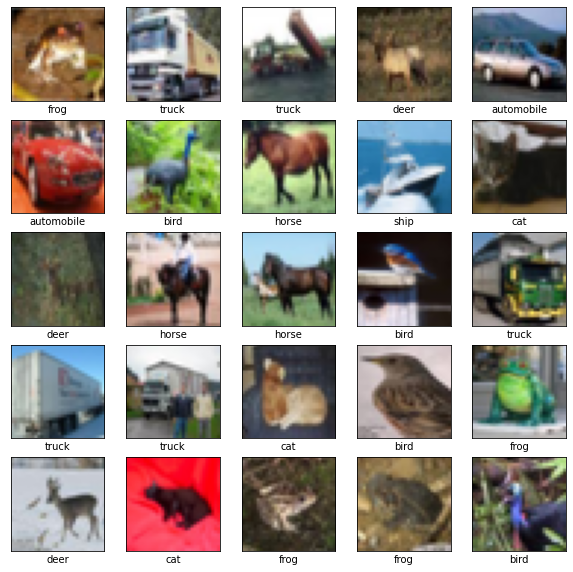

In [5]:
# Normalize pixel values to be between 0 and 1
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    plt.xlabel(class_names[train_labels[i][0]])
    # thats why you need the extra index--^^^
plt.show()

### These are the class names annotating each image 

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

## Train the model - ie fit the model to the training data

In [7]:
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels)
                   )

Epoch 1/3
1563/1563 [==============================] - 66s 41ms/step - loss: 1.7700 - accuracy: 0.3453 - val_loss: 1.2510 - val_accuracy: 0.5492
Epoch 2/3
1563/1563 [==============================] - 55s 35ms/step - loss: 1.1724 - accuracy: 0.5828 - val_loss: 1.0978 - val_accuracy: 0.6207
Epoch 3/3
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0075 - accuracy: 0.6429 - val_loss: 0.9764 - val_accuracy: 0.6541


## Show the output from trained model

In [8]:
model.predict(test_images[50:51])

array([[ 0.2239675 , -0.21402082,  1.1840335 , -0.30669978, -3.2284074 ,
        -0.8670571 , -2.015921  ,  0.46851304, -1.1006478 ,  5.9736147 ]],
      dtype=float32)

In [9]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

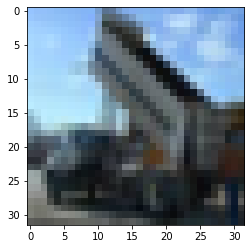

truck


In [10]:
plt.imshow(test_images[50])
plt.show()
print(class_names[test_labels[50][0]])

### Adjust the dataset to make a simple 'Frog or Not-Frog' AI

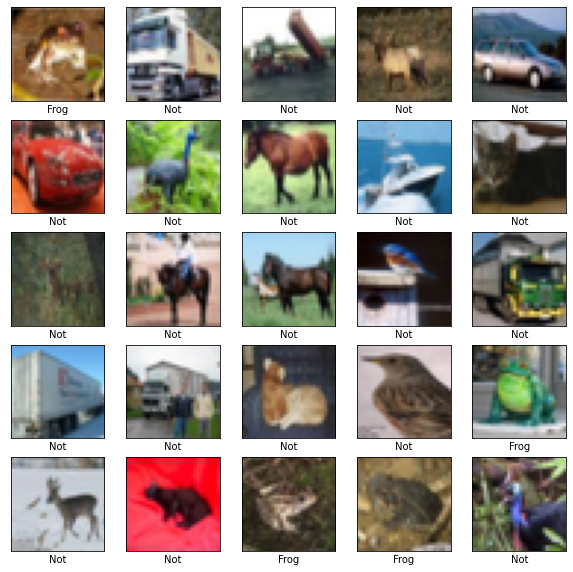

In [11]:
# Make a 'limited' dataset copy and work with that data
limited_train_images = np.copy(train_images)
limited_test_images = np.copy(train_images)
limited_train_labels = np.copy(train_labels)
limited_test_labels = np.copy(train_labels)


# The 'frog' label is number 6 in the original train_labels dataset.
# We will change 'frog' to label 1, and 'not frog' to label 0
limited_train_labels[limited_train_labels!=6] = 0
limited_train_labels[limited_train_labels==6] = 1

limited_test_labels[limited_test_labels!=6] = 0
limited_test_labels[limited_test_labels==6] = 1

new_names = ['Not', 'Frog']


# Display the altered dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(limited_test_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    plt.xlabel(new_names[limited_test_labels[i][0]])
    # which is why you need the extra index -- ^^^
plt.show()

## Defne the 'Frog or Not' model

In [12]:
model_frog = models.Sequential()
model_frog.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_frog.add(layers.MaxPooling2D((2, 2)))
model_frog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_frog.add(layers.MaxPooling2D((2, 2)))
model_frog.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_frog.add(layers.Flatten())
model_frog.add(layers.Dense(64, activation='relu'))
model_frog.add(layers.Dense(10))
model_frog.add(layers.Dense(2))

model_frog.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train the model

In [13]:
history = model_frog.fit(limited_train_images, limited_train_labels, epochs=3,
                    validation_data=(limited_test_images, limited_test_labels))


Epoch 1/3
1563/1563 [==============================] - 74s 47ms/step - loss: 0.2632 - accuracy: 0.9001 - val_loss: 0.1694 - val_accuracy: 0.9390
Epoch 2/3
1563/1563 [==============================] - 68s 43ms/step - loss: 0.1631 - accuracy: 0.9378 - val_loss: 0.1503 - val_accuracy: 0.9455
Epoch 3/3
1563/1563 [==============================] - 66s 42ms/step - loss: 0.1461 - accuracy: 0.9441 - val_loss: 0.1187 - val_accuracy: 0.9557


In [15]:
# model.input_shape
model_frog.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### The model output is a 2 number array - one number for each label [ not, frog ]

This matches the format of the labels originally used to train the model.

In [17]:
model_frog.predict(limited_test_images[1:2])

array([[ 7.586084, -8.613263]], dtype=float32)

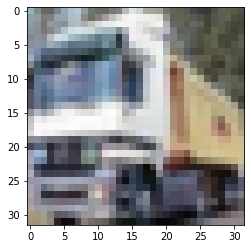

airplane


In [21]:
print(f'List of names: {new_names}')
plt.imshow(limited_test_images[1])
plt.show()
print(f'Prediction: {new_names[limited_test_labels[1][0]]}')

In [19]:
model_frog.predict(limited_test_images[1:2])

array([[ 7.586084, -8.613263]], dtype=float32)

## Let's make this easier to read by showing the model output with the picture and result

We can wrap this all up in a simple function - let's call it 'infer'

In [22]:
def infer(img_no):
    img_arr = limited_test_images[img_no]

    plt.figure(figsize=(4, 2))

    plt.xticks([])
    plt.yticks([])
    plt.imshow(img_arr, cmap=plt.cm.binary)
    plt.xlabel(new_names[limited_test_labels[img_no][0]])

    plt.show()

    print(f'Inference: {model_frog.predict(limited_test_images[img_no:img_no+1])}')



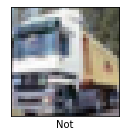

Inference: [[ 7.586084 -8.613263]]


In [23]:
infer(1)


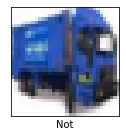

Inference: [[ 6.3019013 -6.8726044]]


In [24]:
infer(5002)


In [ ]:
infer(22)

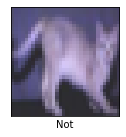

Inference: [[ 3.4496808 -3.9868093]]


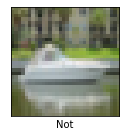

Inference: [[ 1.5550463 -1.5613921]]


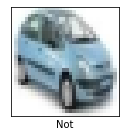

Inference: [[ 4.407437  -4.8079042]]


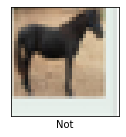

Inference: [[ 5.7378826 -7.041171 ]]


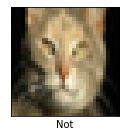

Inference: [[ 0.81221104 -0.73418635]]


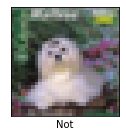

Inference: [[ 2.7608604 -3.2698238]]


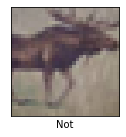

Inference: [[ 3.7867455 -4.7095203]]


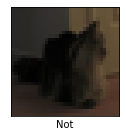

Inference: [[ 2.9907084 -3.7169607]]


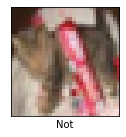

Inference: [[ 3.6659656 -4.7998657]]


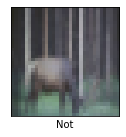

Inference: [[ 5.29015   -6.5286036]]


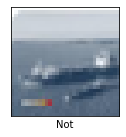

Inference: [[ 3.9909973 -4.2709694]]


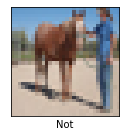

Inference: [[ 4.2539454 -4.59715  ]]


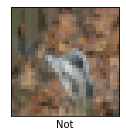

Inference: [[ 0.7380984  -0.88405186]]


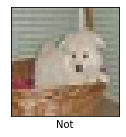

Inference: [[ 1.5979108 -2.2246516]]


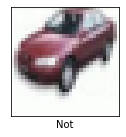

Inference: [[ 3.71184   -3.9591312]]


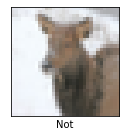

Inference: [[ 2.962335  -3.2013614]]


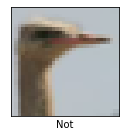

Inference: [[ 2.9834633 -3.7793503]]


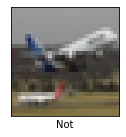

Inference: [[ 3.6188974 -4.111705 ]]


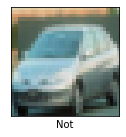

Inference: [[ 4.53553  -5.101657]]


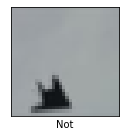

Inference: [[ 2.32281  -2.818322]]


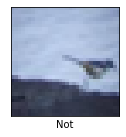

Inference: [[ 6.9443564 -8.140406 ]]


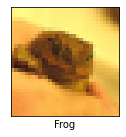

Inference: [[ 0.434906   -0.16972947]]


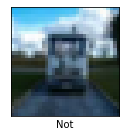

Inference: [[ 5.8431854 -6.171523 ]]


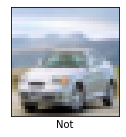

Inference: [[ 5.4656634 -6.2552795]]


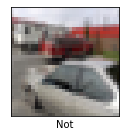

Inference: [[ 4.1600184 -4.2479253]]


In [25]:
for img_number in range(49975,50000):
    infer(img_number)


## Save the Model

note the `!` which passes the command to the command line/console.  Here it creates the directory `./saved-model`

In [28]:
import os
print(f'Current Directory: {os.getcwd()}')
!mkdir -p saved_model2

# Save the entire model as a SavedModel.
model_frog.save('saved_model2/frog_model2')

Current Directory: C:\Users\oli_n\pycode\R4 Didactic


A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model2/frog_model2\assets


## Test with outside images

### Load the images

In [29]:
# from matplotlib import image
from PIL import Image

img_dir = 'C:\\Users\\oli_n\\pycode\\Jupyter\\internet_images\\'

internet_frog = Image.open(img_dir + 'frog.jpg')
internet_merlion = Image.open(img_dir + 'merlion.jpg')
internet_kermit = Image.open(img_dir + 'kermit.jpg')


### Display the three new images

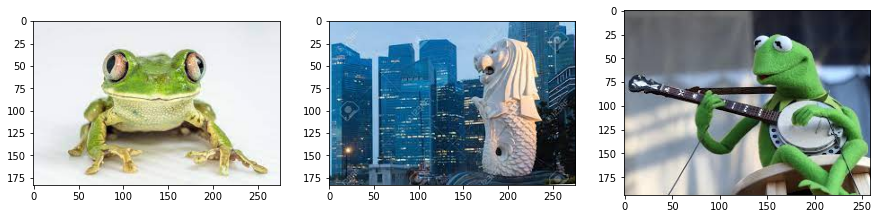

In [30]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(internet_frog)
plt.subplot(1,3,2)
plt.imshow(internet_merlion)
plt.subplot(1,3,3)
plt.imshow(internet_kermit)
plt.show()

### Convert images to fit the input requirements of the AI: 32 x 32 x 3

In [31]:
import numpy as np

internet_frog_small = internet_frog.resize((32,32))
internet_merlion_small = internet_merlion.resize((32,32))
internet_kermit_small = internet_kermit.resize((32,32))


new_imgs = np.stack([np.asarray(internet_frog_small),
                     np.asarray(internet_merlion_small),
                     np.asarray(internet_kermit_small)],
                    axis=0)
new_imgs.shape

(3, 32, 32, 3)

In [32]:
new_imgs.min()

0

## Make example processing easy with a function - let's call this one `infer_img()` which takes an iterable container containing images.

Note that is_Frog is considered 'True' if the right hand number is higher.

`normalise()` is a function that converts values in th eimage files (we know these range from 0 upto 255) to 0 to 1.

In [33]:
import numpy as np


def normalise(in_img):
    # Assume 0 to max.
    normalised_img = in_img / in_img.max()
    return normalised_img


def infer_img(img):

    for i, im in enumerate(img):
        plt.figure(figsize=(4, 2))

        plt.xticks([])
        plt.yticks([])
        plt.imshow(im, cmap=plt.cm.binary)
        plt.show()

        output = model_frog.predict(img[i:i+1])
        if output[0,0] > output[0,1]:
            is_frog = False
        else:
            is_frog = True

        print(f'Inference: {output}: Is frog? {is_frog}')


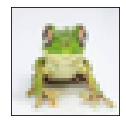

Inference: [[-0.24255617  1.0440341 ]]: Is frog? True


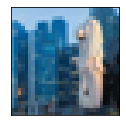

Inference: [[ 5.741711  -6.2221937]]: Is frog? False


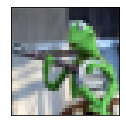

Inference: [[ 2.025755  -1.7767718]]: Is frog? False


In [34]:

out = infer_img(normalise(new_imgs))

# Great! Let's see how to use this model in a 'real world' application in the next notebook:

# `Part 2 - Load Frog Model.ipynb`